In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train = pd.read_csv("../data/train.csv",nrows=3000)

In [4]:
train.shape

(3000, 202)

In [5]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [6]:
train.drop('ID_code',inplace=True,axis=1)

In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.101000,10.754725,-1.626211,10.642953,6.839801,11.076096,-5.050040,5.385525,16.640324,0.343191,...,3.290306,7.392230,1.929590,3.246161,18.000129,-0.153181,2.232343,8.910237,15.912750,-3.303876
std,0.301379,3.038687,4.117266,2.614134,2.058836,1.633034,8.038345,0.867383,3.403695,3.333472,...,4.620337,3.013084,1.500066,3.987165,3.187525,1.415042,5.431875,0.930467,2.954417,10.504392
min,0.000000,1.335000,-13.422700,3.678500,1.154100,6.361100,-29.013300,2.683300,8.017000,-9.476600,...,-11.593900,-1.215800,-2.927700,-8.922900,10.791200,-4.488300,-12.325500,6.343300,7.459100,-36.302500
25%,0.000000,8.543525,-4.691500,8.629950,5.234775,9.837850,-11.360775,4.746450,14.103725,-2.240100,...,-0.011650,5.137225,0.886375,0.523225,15.589525,-1.168525,-2.037175,8.255150,13.957825,-11.370000
50%,0.000000,10.648750,-1.615800,10.518700,6.865350,11.072600,-4.856150,5.350850,16.622750,0.419850,...,3.307400,7.269900,1.938750,3.307000,17.974650,-0.199200,2.452900,8.894700,15.947500,-2.976700
75%,0.000000,12.785850,1.278300,12.432900,8.389500,12.281500,1.098275,5.997975,19.125675,2.971850,...,6.418850,9.467700,2.974475,6.100725,20.482375,0.796300,6.286925,9.584825,18.100200,4.916700
max,1.000000,19.289300,8.416000,18.347700,12.674000,15.110800,17.251600,7.875500,26.284800,8.482900,...,16.211600,15.686300,7.139000,16.103300,26.253000,3.503500,14.843600,11.701200,25.442200,25.094400


In [8]:
train.target.value_counts()

0    2697
1     303
Name: target, dtype: int64

In [25]:
def plotkde(data_1,data_0,features):
    sns.set_style('whitegrid')
    fig,ax = plt.subplots(25,8,figsize=(15,50))
    i = 0
    
    for feature in features:
        i += 1
        plt.subplot(25,8,i)
        sns.kdeplot(data_1[feature], bw=0.5,label='1')
        sns.kdeplot(data_0[feature], bw=0.5,label='0')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

In [27]:
features = train.columns[1:]

In [29]:
d1 = train.loc[train.target == 1]
d0 = train.loc[train.target == 0]

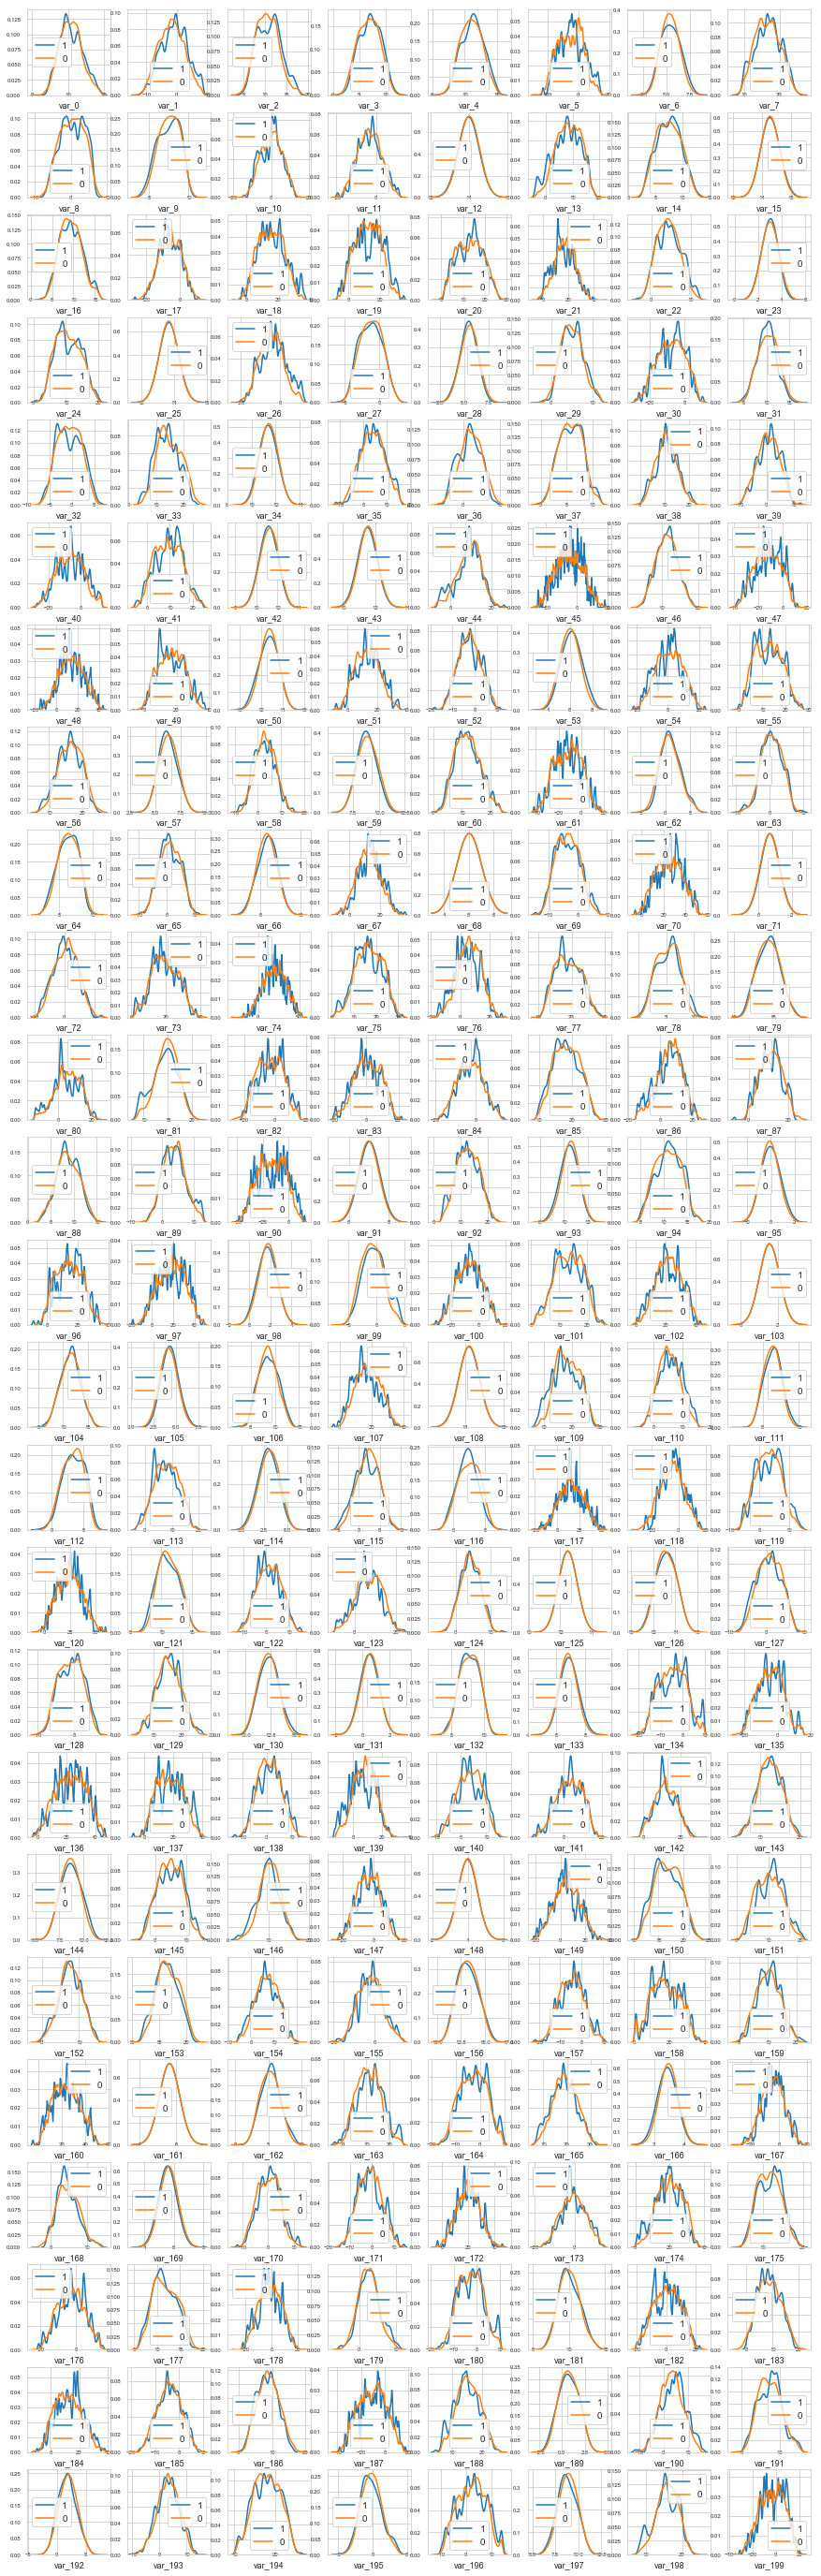

In [30]:
plotkde(d1,d0,features)